### 3.2 Water Ponding

Si analizza il fenomeno dell'infiltrazione in una colonna di suolo ipotizzando un water ponding costante di 0.4 mm.

#### **Definizione della griglia**

**- grid_input_file_name** : `/data/Grid_input/dati_colonna1_BC.csv`

**- ic_input_file_name** : `/data/Grid_input/dati_colonna1_IC.csv`

**- parameter_input_file_name** : `/data/Grid_input/Richards_BC.csv`

**- grid_type** : `classical`

**- psi_interp_model** : `linear`

**- T_interp_model** : `linear`

**- output_file_name** : `/data/Grid_NetCDF/colonna1_Grid_2.nc`

---

#### **Creazione della griglia**

In [1]:
import os
import pandas as pd
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
import warnings
warnings.filterwarnings('ignore')

project_path = os.path.dirname(os.getcwd())

grid_input_file_name = project_path + "/data/Grid_input/dati_colonna1_BC.csv"
ic_input_file_name = project_path + "/data/Grid_input/dati_colonna1_IC.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_BC.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'

dz_min = -9999 
dz_max = -9999 
b = -9999      

psi_interp_model = "linear"
T_interp_model = "linear"

output_file_name =  project_path + "/data/Grid_NetCDF/colonna1_Grid_2.nc"
output_title = '''Griglia di calcolo per colonna 1 simulazione 2.
                  '''
output_summary = '''

'''
output_date = ''
output_institution = 'GEOframe'

In [2]:
data_grid = pd.read_csv(grid_input_file_name)
data_ic = pd.read_csv(ic_input_file_name)
data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_summary, output_date, output_institution, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\User\Desktop\OMS_Project_WHETGEO1D_Idrologia_ay_21_22/data/Grid_NetCDF/colonna1_Grid_2.nc


#### **Definizione dei parametri e delle condizioni al contorno**

Dopo aver creato il file netCDF relativo alla griglia, si prosegue con la simulazione utilizzando il simfile WHETGEO1D_sim2.sim, che permette di risolvere il problema di Richards. In tale file sono stati utilizzati i seguenti parametri :

- parametrizzazione della SWRC : **Brooks & Corey**
- condizione al contorno sulla superficie : **Coupled**
- condizione al contorno al fondo : **Dirichlet** -> **fondo impermeabile**
- modello che tiene conto della temperatura del suolo: **Ronan1998**
- data d'inizio della simulazione : **25/12/2020 00:00**
- data di fine della simulazione : **26/12/2020 00:00**
- timestep : **1 (ogni minuto)**

---

#### **Post-processing**

#### Librerie

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "times new roman",
        "axes.labelsize": 17,
        "font.size": 18,
        "legend.fontsize": 15,
        "xtick.labelsize": 17,
        "ytick.labelsize": 17,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58'])
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
plt.rcParams.update(nice_fonts)

#### Visualizzazione del file di output

In [4]:
ds2 = xr.open_dataset(project_path + '/output/sim2_WP_0000.nc')
ds2

<xarray.Dataset>
Dimensions:           (depth: 150, dualDepth: 150, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.49 -1.47 -1.45 ... -0.0075 -0.0025
  * dualDepth         (dualDepth) float64 -1.5 -1.48 -1.46 ... -0.01 -0.005
  * time              (time) datetime64[ns] 2020-12-25 ... 2020-12-26
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex01.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\User\Desktop\OMS_Project_WHE...
    path_bottom_boundary_condition:     C:\Users\User\Desktop\OMS_Project_WHE...
    path_grid:                          C:\Users\User\Desktop\OMS_Project_WHE...
    time_delta:                          
    swrc_model:                         {Brooks Corey}
    soil_hydraulic_conductivity_model:  {Mualem Brooks Corey}
    interface_conductivity_model:       max

#### Grafici 2-D

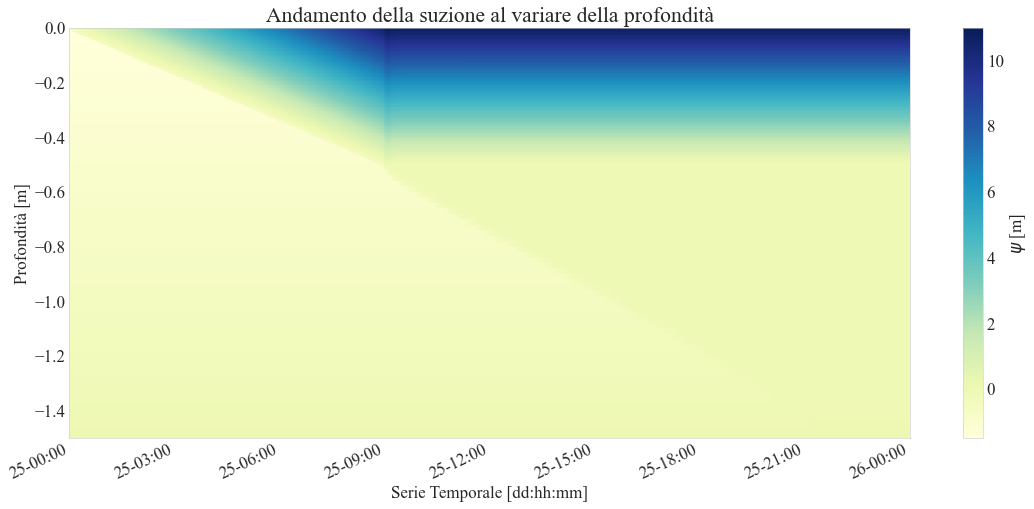

In [5]:
# Variazione della suzione nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds2.psi.values), vmax=np.amax(ds2.psi.values))
ds2.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})
ax.set_title('Andamento della suzione al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M')) 
ax.xaxis.set_tick_params(rotation=25)

plt.tight_layout()
plt.show()

**Commento al grafico**

Nel grafico sovrastante, nello strato più superficiale, si denotano valori di suzione positivi. Tale affermazione giustifica la formazione di ponding (pozzanghera) superficiale.

Nel secondo strato, non saturo, la suzione si mantiene su valori negativi, in ogni caso prossimi a 0. 

In entrambi gli strati si evidenzia un andamento pressochè lineare del profilo di suzione.

Sul fondo si può osservare come la suzione si mantenga sempre uguale a 0 a causa dell'imposizione della condizione al contorno di fondo impermeabile.

---

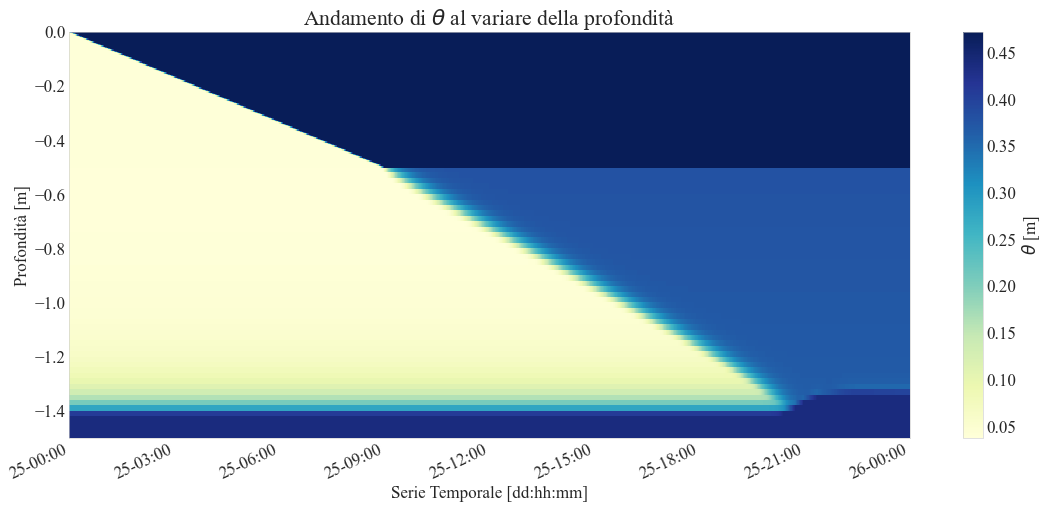

In [6]:
# Variazione del contenuto d'acqua nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds2.theta.values), vmax=np.amax(ds2.theta.values))
ds2.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [m]'})
ax.set_title('Andamento di $\\theta$ al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax.xaxis.set_tick_params(rotation=25)

plt.tight_layout()
plt.show()

**Commento al grafico**

Nel primo strato si denota il raggiungimento della condizione di saturazione, in cui il contenuto d'acqua coincide con la porosità del mezzo (tutti i pori riempiti d'acqua). Tale condizione è evidente anche nel grafico precedente, in cui ,nello strato superficiale, si hanno valori di suzione positivi.

Nel grafico si evidenzia come l'approfondimento del fronte di saturazione abbia un andamento lineare. Tale andamento si differenzia nei 2 strati a causa di una diversa conducibilità idraulica di essi.

A causa della condizione al contorno di fondo impermeabile si osserva alla base della colonna un fronte di saturazione. Tale fronte, a seguito dell'arrivo dell'acqua infiltratasi dalla superficie, va incontro al fenomeno di risalita capillare.

---

#### Grafici 1-D

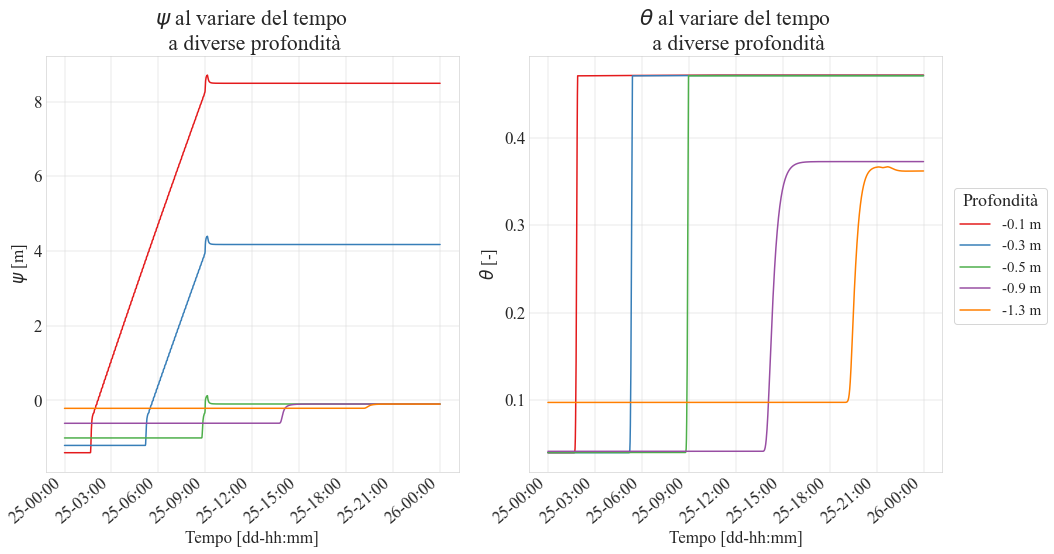

In [15]:
# Profilo della suzione e del contenuto d'acqua a diverse profondità

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 13/1.618)) 

ds2.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds2.psi.sel(depth=-0.3, method='nearest').plot(ax=ax1, color=colors[1])
ds2.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds2.psi.sel(depth=-0.9, method='nearest').plot(ax=ax1, color=colors[3])
ds2.psi.sel(depth=-1.3, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title ('$\psi$ al variare del tempo \n a diverse profondità')
ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Tempo [dd-hh:mm]')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax1.xaxis.set_tick_params(rotation=40)

ds2.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds2.theta.sel(depth=-0.3, method='nearest').plot(ax=ax2, label = '-0.3 m', color=colors[1])
ds2.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds2.theta.sel(depth=-0.9, method='nearest').plot(ax=ax2, label = '-0.9 m', color=colors[3])
ds2.theta.sel(depth=-1.3, method='nearest').plot(ax=ax2, label = '-1.3 m', color=colors[4])

ax2.set_title('$\\theta$ al variare del tempo \n a diverse profondità')
ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Tempo [dd-hh:mm]')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax2.xaxis.set_tick_params(rotation=40)
ax2.legend(bbox_to_anchor=(1.01,0.7), ncol=1, title='Profondità')

plt.tight_layout()
plt.show()

**Commento ai grafici**

Nel grafico della suzione si osservano valori positivi di tale grandezza (in particolare negli strati più superficiali). Tale affermazione giustifica la presenza di ponding superficiale.
La variazione della suzione nei vari strati si concentra nell'intervallo compreso tra le ore 02:00 e le ore 19:00 del 25/12/2020. Questa variazione è più marcata negli strati in prossimità della superficie e tende a diminuire all'aumentare della profondità fino a diventare pressochè trascurabile al fondo.
Con il trascorrere del tempo, per effetto dell'approfondimento del fronte di saturazione, si ha una traslazione in avanti del picco di suzione (come riscontrato nel grafico 2D della suzione).

Nel grafico del contenuto d'acqua si denota come, in tempi ridotti, gli strati prossimi alla superficie (limo e arilla), raggiungano la condizione di saturazione (contenuto d'acqua pari alla porosità). Tale condizione non è raggiunta all'interno dello strato di sabbia.

Alla profondità di -1.3 m (in prossimità del fondo della colonna) si evidenzia che:
- il contenuto d'acqua inizialmente non è nullo ma è pari a 0.1 a causa della condizione di fondo impermeabile;
- il contenuto d'acqua ha un picco in corrispondenza delle ore 21:00 del 25/12/2020 seguito da un lieve calo.

---

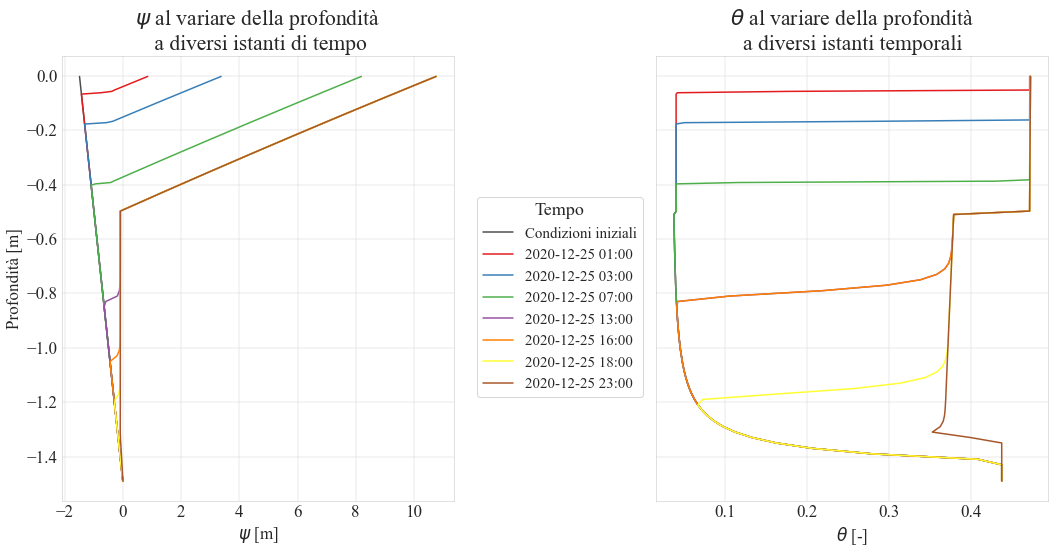

In [27]:
# Profilo della suzione e del contenuto d'acqua a diversi istanti temporali

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(15, 13/1.618)) 

ds2.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
ds2.psi.sel(time='2020-12-25 01:00').plot(ax=ax1, y='depth', label='2020-12-25 01:00', color=colors[0])
ds2.psi.sel(time='2020-12-25 03:00').plot(ax=ax1, y='depth', label='2020-12-25 03:00', color=colors[1])
ds2.psi.sel(time='2020-12-25 07:00').plot(ax=ax1, y='depth', label='2020-12-25 07:00', color=colors[2])
ds2.psi.sel(time='2020-12-25 13:00').plot(ax=ax1, y='depth', label='2020-12-25 13:00', color=colors[3])
ds2.psi.sel(time='2020-12-25 16:00').plot(ax=ax1, y='depth', label='2020-12-25 16:00', color=colors[4])
ds2.psi.sel(time='2020-12-25 18:00').plot(ax=ax1, y='depth', label='2020-12-25 18:00', color=colors[5])
ds2.psi.sel(time='2020-12-25 23:00').plot(ax=ax1, y='depth', label='2020-12-25 23:00', color=colors[6])

ax1.set_title('$\psi$ al variare della profondità \n a diversi istanti di tempo')
ax1.set_ylabel('Profondità [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Condizioni iniali', color='0.3')
ds2.theta.sel(time='2020-12-25 01:00').plot(ax=ax2, y='depth', label='2020-12-25 01:00', color=colors[0])
ds2.theta.sel(time='2020-12-25 03:00').plot(ax=ax2, y='depth', label='2020-12-25 03:00', color=colors[1])
ds2.theta.sel(time='2020-12-25 07:00').plot(ax=ax2, y='depth', label='2020-12-25 07:00', color=colors[2])
ds2.theta.sel(time='2020-12-25 13:00').plot(ax=ax2, y='depth', label='2020-12-25 13:00', color=colors[3])
ds2.theta.sel(time='2020-12-25 13:00').plot(ax=ax2, y='depth', label='2020-12-25 16:00', color=colors[4])
ds2.theta.sel(time='2020-12-25 18:00').plot(ax=ax2, y='depth', label='2020-12-25 18:00', color=colors[5])
ds2.theta.sel(time='2020-12-25 23:00').plot(ax=ax2, y='depth', label='2020-12-25 23:00', color=colors[6])

ax2.set_title('$\\theta$ al variare della profondità \na diversi istanti temporali')
ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')
ax1.legend(bbox_to_anchor=(1.5,0.7), ncol=1, title='Tempo')

plt.tight_layout()
plt.show()

**Commento ai grafici**

Nel grafico sovrastante relativo alla suzione si osserva come la condizione iniziale sia idrostica, poichè vi è una relazione diretta tra suzione e profondità (retta).
Inoltre si nota come a diversi istanti temporali successivi il fronte di saturazione si approfondisce (abbassamento delle curve).
All' aumentare della profondità si nota una diminuzione della suzione che passa da valori positivi a negativi tranne nell'ultimo istante temporale considerato (curva marrone) dove la suzione non presenta valori negativi.

Nel grafico relativo a $\theta$ si evidenzia come nello strato composto da limo e argilla il contenuto d'acqua, all'aumentare della profondità, passi molto velocemente da valori prossimi alla saturazione a valori molto contenuti. Tale variazione si presenta in maniera meno marcata nello strato composto da sabbia (linee arancio e gialla) a causa dell'approfondimento del fronte di saturazione.
In prossimità del fondo il contenuto d'acqua, risentendo della condizione di fondo impermeabile, tende nuovamente ad aumentare.

---

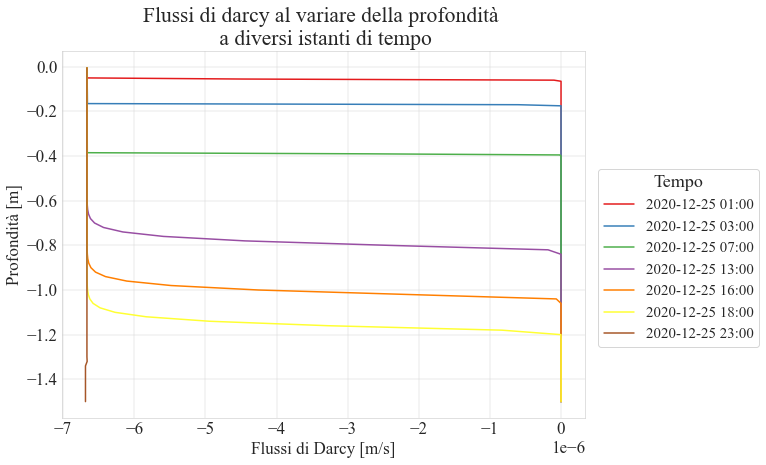

In [13]:
#Profilo dei flussi di darcy al variare della profondità a diversi istanti temporali

fig, ax = plt.subplots(1, 1, sharey='row', figsize=(11, 11/1.618)) 

ds2.darcyVelocity.sel(time='2020-12-25 01:00').plot(ax=ax, y='dualDepth', label='2020-12-25 01:00', color=colors[0])
ds2.darcyVelocity.sel(time='2020-12-25 03:00').plot(ax=ax, y='dualDepth', label='2020-12-25 03:00', color=colors[1])
ds2.darcyVelocity.sel(time='2020-12-25 07:00').plot(ax=ax, y='dualDepth', label='2020-12-25 07:00', color=colors[2])
ds2.darcyVelocity.sel(time='2020-12-25 13:00').plot(ax=ax, y='dualDepth', label='2020-12-25 13:00', color=colors[3])
ds2.darcyVelocity.sel(time='2020-12-25 16:00').plot(ax=ax, y='dualDepth', label='2020-12-25 16:00', color=colors[4])
ds2.darcyVelocity.sel(time='2020-12-25 18:00').plot(ax=ax, y='dualDepth', label='2020-12-25 18:00', color=colors[5])
ds2.darcyVelocity.sel(time='2020-12-25 23:00').plot(ax=ax, y='dualDepth', label='2020-12-25 23:00', color=colors[6])

ax.set_title('Flussi di darcy al variare della profondità \n a diversi istanti di tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Flussi di Darcy [m/s]')
ax.legend(bbox_to_anchor=(1.01,0.7), ncol=1, title="Tempo")

plt.tight_layout()
plt.show()

**Commenti al grafico**

Per la totalità degli istanti temporali considerati i flussi di Darcy aumentano; in particolare per le prime fascie orarie analizzate tale aumento risulta molto marcato.

Al contrario, nell'ultimo istante temporale considerato, si evidenzia come non vi sia un aumento del flusso.

--- 
